In [9]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime
import json
from bs4 import BeautifulSoup
import requests
 
%matplotlib inline
grey = .6, .6, .6

fsym = "ETH"
tsym = "USD"
 
url = "https://www.cryptocompare.com/api/data/coinsnapshot/?fsym=" + \
       fsym + "&tsym=" + tsym
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
dic = json.loads(soup.prettify())
#print(dic)

In [10]:
market = []
d = dic['Data']['Exchanges']  # a list
for i in range(len(d)):
    market.append(d[i]['MARKET'])
    print(market[-1])

Cexio
Coinbase
Coinroom
Gemini
Bitfinex
Cryptsy
Tidex
CCEX
Gatecoin
BTCE
Kraken
OKCoin
Exmo
WavesDEX
BitTrex
Remitano
Poloniex
Bitstamp
HitBTC
Lykke
BitBay
LiveCoin
Yobit
Quoine


In [11]:
vol = []
d = dic['Data']['Exchanges']  # a list
for i in range(len(d)):
    vol.append([d[i]['MARKET'], round(float(d[i]['VOLUME24HOUR']),2)])
 
# sort a list of sublists according to 2nd item in a sublist
vol = sorted(vol, key=lambda x: -x[1])
 
# Cryptocurrency Markets according to Volume traded within last 24 hours
for e in vol:
    print("%10s%15.2f" % (e[0], e[1]))

  Bitfinex      199280.12
  Coinbase      134602.45
  Poloniex       55508.19
  Bitstamp       37731.26
    Gemini       33567.36
   BitTrex       30379.45
    Kraken       27844.36
    HitBTC       26652.98
     Cexio        9408.83
      Exmo        2578.71
    Quoine        2091.54
     Yobit         696.74
    OKCoin         654.67
  Coinroom         173.00
     Lykke          63.18
     Tidex          34.12
      CCEX          24.23
  Gatecoin          20.44
  LiveCoin          11.46
   Cryptsy           0.00
      BTCE           0.00
  WavesDEX           0.00
  Remitano           0.00
    BitBay           0.00


In [12]:
markets = [e[0] for e in vol][0:10]
print(markets)

['Bitfinex', 'Coinbase', 'Poloniex', 'Bitstamp', 'Gemini', 'BitTrex', 'Kraken', 'HitBTC', 'Cexio', 'Exmo']


In [13]:
def fetchCryptoOHLC_byExchange(fsym, tsym, exchange):
    # a function fetches a crypto OHLC price-series for fsym/tsym and stores
    # it in a pandas DataFrame; uses specific Exchange as provided
    # src: https://www.cryptocompare.com/api/
 
    cols = ['date', 'timestamp', 'open', 'high', 'low', 'close']
    lst = ['time', 'open', 'high', 'low', 'close']
 
    timestamp_today = datetime.today().timestamp()
    curr_timestamp = timestamp_today
 
    for j in range(2):
        df = pd.DataFrame(columns=cols)
        url = "https://min-api.cryptocompare.com/data/histoday?fsym=" + fsym + \
              "&tsym=" + tsym + "&toTs=" + str(int(curr_timestamp)) + \
              "&limit=2000" + "&e=" + exchange
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        dic = json.loads(soup.prettify())
 
        for i in range(1, 2001):
            tmp = []
            for e in enumerate(lst):
                x = e[0]
                y = dic['Data'][i][e[1]]
                if(x == 0):
                    # timestamp-to-date
                    td = datetime.fromtimestamp(int(y)).strftime('%Y-%m-%d')
                    tmp.append(td)  #(str(timestamp2date(y)))
                tmp.append(y)
            if(np.sum(tmp[-4::]) > 0):
                df.loc[len(df)] = np.array(tmp)
        df.index = pd.to_datetime(df.date)
        df.drop('date', axis=1, inplace=True)
        curr_timestamp = int(df.iloc[0][0])
 
        if(j == 0):
            df0 = df.copy()
        else:
            data = pd.concat([df, df0], axis=0)
 
    return data.astype(np.float64)

In [14]:
if ('cp' in globals()) or ('cp' in locals()): del cp
 
# download daily OHLC price-series for ETH/USD for a given 'market'
# extract close-price (cp)
 
print("%s/%s" % (fsym, tsym))
for market in markets:
    print("%12s... " % market, end="")
    df = fetchCryptoOHLC_byExchange(fsym, tsym, market)
    ts = df[(df.index > "2017-06-01") & (df.index <= "2017-11-05")]["close"]
    ts.name = market
    if ('cp' in globals()) or ('cp' in locals()):
        cp = pd.concat([cp, ts], axis=1, ignore_index=False)
    else:
        cp = pd.DataFrame(ts)
    print("downloaded")

ETH/USD
    Bitfinex... downloaded
    Coinbase... downloaded
    Poloniex... downloaded
    Bitstamp... downloaded
      Gemini... downloaded
     BitTrex... downloaded
      Kraken... downloaded
      HitBTC... downloaded
       Cexio... downloaded
        Exmo... downloaded


In [15]:
print(cp.head(10))
print(cp.tail(10))

            Bitfinex  Coinbase  Poloniex  Bitstamp  Gemini  BitTrex  Kraken  \
date                                                                          
2017-06-02    217.01    224.95    217.22       NaN  224.50   217.00  224.23   
2017-06-03    241.06    245.50    217.22       NaN  245.90   239.50  245.35   
2017-06-04    242.16    248.00    242.10       NaN  248.37   246.41  247.60   
2017-06-05    261.89    264.58    262.00       NaN  267.44   264.82  263.60   
2017-06-06    250.70    255.68    250.50       NaN  256.02   253.93  256.19   
2017-06-07    256.95    258.64    257.43       NaN  261.04   257.00  260.24   
2017-06-08    278.41    279.38    278.85       NaN  280.21   278.50  279.85   
2017-06-09    325.88    340.20    326.00       NaN  331.22   324.10  326.00   
2017-06-10    336.33    343.01    335.00       NaN  339.00   335.72  333.10   
2017-06-11    386.90    397.37    386.50       NaN  394.90   385.02  385.00   

            HitBTC   Cexio    Exmo  
date          

In [16]:
dist = []
for i in range(cp.shape[1]):
    for j in range(i):
        if(i != j):
            x = np.array(cp.iloc[:,i], dtype=np.float32)
            y = np.array(cp.iloc[:,j], dtype=np.float32)
            diff = np.abs(x-y)
            avg = np.mean(diff)
            std = np.std(diff, ddof=1)
            dist.append([cp.columns[i], cp.columns[j], avg, std])
 
dist = sorted(dist, key=lambda x: -x[2])
print("%10s%10s%10s%10s\n" % ("Coin1", "Coin2", "Mean", "Std Dev"))
for e in dist:
    print("%10s%10s%10.5f%10.2f" % (e[0], e[1], e[2], e[3]))

     Coin1     Coin2      Mean   Std Dev

  Poloniex  Coinbase   2.23885      3.45
  Coinbase  Bitfinex   2.05573      2.78
  Poloniex  Bitfinex   0.67892      1.92
  Bitstamp  Bitfinex       nan       nan
  Bitstamp  Coinbase       nan       nan
  Bitstamp  Poloniex       nan       nan
     Cexio    HitBTC   9.82745      8.24
     Cexio  Poloniex   9.63707      8.23
     Cexio   BitTrex   9.53121      8.24
      Exmo     Cexio   9.52229      5.09
     Cexio  Bitfinex   9.51217      7.92
     Cexio    Gemini   8.56879      8.20
     Cexio    Kraken   8.23688      6.53
     Cexio  Coinbase   7.83185      6.22
      Exmo   BitTrex   6.36777      5.34
      Exmo  Poloniex   6.22153      5.21
      Exmo    HitBTC   6.22006      5.00
      Exmo  Bitfinex   6.12338      5.02
      Exmo    Gemini   5.98892      6.22
      Exmo    Kraken   5.95573      4.38
      Exmo  Coinbase   5.69465      4.22
    HitBTC  Coinbase   2.73433      4.36
    HitBTC    Gemini   2.72605      5.59
    HitBTC    K

157 157


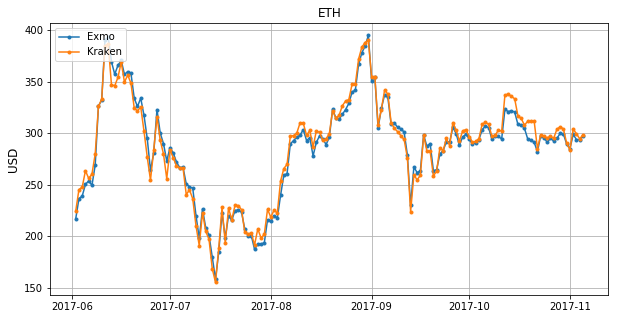

In [17]:
market1 = "Exmo"
market2 = "Kraken"
 
df1 = fetchCryptoOHLC_byExchange(fsym, tsym, market1)
df2 = fetchCryptoOHLC_byExchange(fsym, tsym, market2)
 
# trim
df1 = df1[(df1.index > "2017-06-01") & (df1.index <= "2017-11-05")]
df2 = df2[(df2.index > "2017-06-01") & (df2.index <= "2017-11-05")]
 
# checkpoint
print(df1.close.shape[0], df2.close.shape[0])  # both sizes must be equal
 
# plotting
plt.figure(figsize=(10,5))
plt.plot(df1.close, '.-', label=market1)
plt.plot(df2.close, '.-', label=market2)
plt.legend(loc=2)
plt.title(fsym, fontsize=12)
plt.ylabel(tsym, fontsize=12)
plt.grid()

In [18]:
spread = df1['close'].values - df2['close'].values

In [19]:
spread = df1['close'].values - df2['close'].values

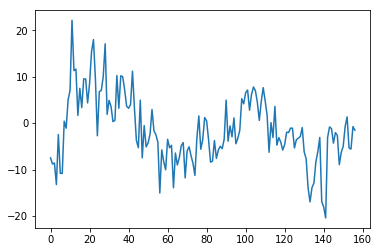

In [20]:
plt.plot(spread)

In [21]:
df1['close'].corr(df2['close'])

0.98847086635429326

In [22]:
import statsmodels.api as sm

C:\Users\Ayu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
res = sm.OLS(df1['close'], df2['close']).fit()

In [24]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.497e+05
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          7.12e-252
Time:                        16:30:15   Log-Likelihood:                -533.49
No. Observations:                 157   AIC:                             1069.
Df Residuals:                     156   BIC:                             1072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
close          0.9950      0.002    499.670      0.000       0.991       0.999
==============================================================================
Omnibus:                        4.243   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.798
Skew:                           0.308   Prob(JB):                        0.150
Kurtosis:                       3.449   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""